In [24]:
import pandas as pd
import numpy as np

In [25]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [9]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Plotting the points**

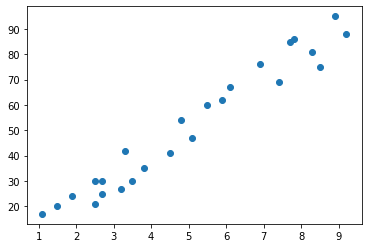

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df['Hours'],df['Scores'])
plt.show()

**Method 1: using stats from scipy**

In [11]:
#method 1 using stats from scipy
from scipy import stats
slope, intercept, cor, p, std_err = stats.linregress(df['Hours'],df['Scores'])

def myfunc(x):
  return slope * x + intercept

model = list(map(myfunc, df['Hours']))



**Plotting the points and the line calculated from the model**


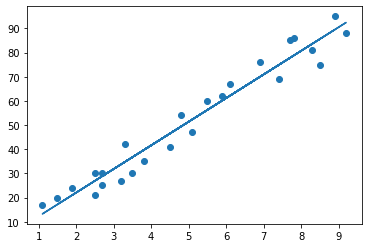

In [13]:
#plotting points and the line calculated
plt.scatter(df['Hours'],df['Scores'])
plt.plot(df['Hours'], model)
plt.show()

**Predicting value for 9.25 using this method**

In [14]:
#for 9.25hrs precidted value is 92.9098
print(myfunc(9.25))

92.90985477015731


**Printing other statistical data**

In [15]:
print(slope) 
print(intercept)
print(cor) #co-efficient of corelation

9.775803390787473
2.4836734053731817
0.9761906560220887


**Method 2: Using LinearRegression from Sklearn**

In [16]:
#Method 2 using LinearRegression from sklearn
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 


In [17]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression().fit(X_train, y_train) 

In [18]:
y_pred = reg.predict(X_test) 
newdf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
newdf

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


**Predicting value for 9.25 hours**

In [19]:
#for 9.25 hours predicted score is 92.9150
val=np.array([9.25]).reshape(1, -1) 
own_pred = reg.predict(val)
print("Predicted Score = {}".format(own_pred[0]))

Predicted Score = 92.91505723477056


**Evaluating the model using R-squared and Mean Squared error metrics**

In [20]:
#Evaluating the model using R-squared metric
print('linear model coeff (w): {}'.format(reg.coef_))
print('linear model intercept (b): {:.3f}'.format(reg.intercept_))
print('R-squared score (training): {:.3f}'.format(reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(reg.score(X_test, y_test)))

linear model coeff (w): [9.78856669]
linear model intercept (b): 2.371
R-squared score (training): 0.948
R-squared score (test): 0.957


In [21]:
#evaluating using MSE metric
from sklearn import metrics  
print('MSE of model:',metrics.mean_absolute_error(y_test, y_pred)) 

MSE of model: 4.419727808027652


**Plotting the points and the calculated line using the model**

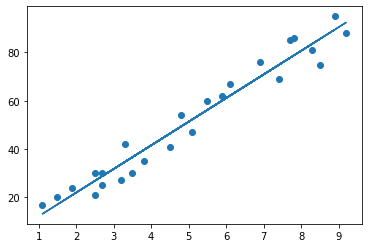

In [23]:
#plotting the points and line calculated
model=reg.coef_*X+reg.intercept_
plt.scatter(X, y)
plt.plot(X, model)
plt.show()